## The Comparison of The Four and Five-Act Comedies in Verse

In this analysis, we will compare the Russian and French four-act verse comedies with the five-act verse comedies based on such features as:

- The number of dramatic characters;
- The mobility coefficient;
- The standard range of the speaking characters (sigma);
- The percentage of non-dialogues;
- The percentage of polylogues;
- The percentage of monologues;
- The coefficient of unused dramatic characters;
- The percentage of discontinuous scenes.

To account for different number of acts (4 vs. 5), we will multiply such features as the number of dramatic characters and the mobility coefficient by 5/4 and rounded to the nearest integer.

Since the 4-act verse comedies were only written in the tentative Period Two in Russian and in Period Three in France, we will use only these periods for comparison.

Additionally, we will compare the values with Kotzebue's only 4-act verse comedy *Der Russe in Deutschland* (1806), Shakespeare, and Goldoni.

In [1]:
import pandas as pd
import numpy as np
import json
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
def get_data(input_directory):
    all_files = [f for f in listdir(input_directory) if f.count('.json') > 0]
    dfs = []
    for file in all_files:
        with open(input_directory + '/' + file) as json_file:
            data = json.load(json_file)
            not_used = coefficient_unused_dramatic_characters(data)
            df = pd.DataFrame([not_used], columns=['coefficient_unused'], index=[file.replace('.json','')])
            dfs.append(df)
            
    features_df = pd.concat(dfs, axis=0, sort=False).round(2)
    
    return features_df

In [3]:
def coefficient_unused_dramatic_characters(data):
    total_present = 0
    total_non_speakers = 0
    for act in data['play_summary'].keys():
        for scene in data['play_summary'][act].keys():
            # identify the raw number of non-speaking dramatic characters
            num_non_speakers = len([item for item in data['play_summary'][act][scene].items() 
                                if (item[1] == 0  or item[1] == 'non_speaking') and item[0] not in ['num_utterances',
                                                                   'num_speakers',
                                                                   'perc_non_speakers']])
            total_non_speakers += num_non_speakers
            # calculate the total number of dramatic characters
            total_present += (data['play_summary'][act][scene]['num_speakers'] + num_non_speakers)
    coefficient_unused = (total_non_speakers / total_present ) * 100        
    
    return coefficient_unused

In [4]:
comedies = pd.read_csv('../Russian_Comedies/Data/Comedies_Raw_Data.csv')
# sort by creation date
comedies_sorted = comedies.sort_values(by='creation_date').copy()

In [5]:
# rename column names for clarity
comedies_sorted = comedies_sorted.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                  'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues',
                                                  'percentage_scenes_with_discontinuous_change_characters': 
                                                  'discontinuous_scenes'})

In [6]:
# calculate the coefficient of non-used dramatic characters
unused_coefficient = get_data('../Russian_Comedies/Play_Jsons/')
unused_coefficient['index'] = unused_coefficient.index.tolist()
comedies_sorted = comedies_sorted.merge(unused_coefficient, on='index')

### Find Out When The Four-Act Comedies Were Written

In [7]:
comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & 
                                   (comedies_sorted['num_acts'] == 4)].copy()

,index,title,first_name,last_name,creation_date,translation/adaptation,num_acts,free_iambs,num_present_characters,num_scenes_text,...,percentage_scenes_rhymes_split_verse,num_stage_directions,stage_directions_frequency,num_word_tokens_in_stage_directions,average_length_of_stage_direction,num_verse_splitting_stage_directions,degree_of_verse_prose_interaction,number_scenes_with_discontinuous_change_characters,discontinuous_scenes,coefficient_unused
16,R_16,"Vospitalie, ili vot pridanoe",Fiodor,Kokoshkin,1824,0,4,0,11,33,...,10.811,407,23.567,1228,3.017,163,9.438,1,3.030,14.05
17,R_18,Gore ot uma,Aleksandr,Griboedov,1824,0,4,1,34,60,...,9.333,251,14.204,990,3.944,78,4.414,4,5.333,36.77
21,R_22,Blagorodnyi teatr,Mikhail,Zagoskin,1828,0,4,0,24,47,...,24.242,360,18.557,993,2.758,198,10.206,1,1.515,45.48
22,R_23,Nedovol’nye,Mikhail,Zagoskin,1835,0,4,1,23,33,...,17.241,272,15.888,976,3.588,151,8.820,3,5.172,41.73
24,R_25,Komediia iz sovremennoi zhizni,Nikolai,Krol’,1849,0,4,1,21,33,...,11.321,219,15.466,364,1.662,101,7.133,9,16.981,24.62


In [8]:
five_act = comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & (comedies_sorted['num_acts'] == 5) &
                                   (comedies_sorted['creation_date'].between(1796, 1849))].copy()

In [9]:
four_act = comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & (comedies_sorted['num_acts'] == 4) &
                                   (comedies_sorted['creation_date'].between(1796, 1849))].copy()

In [10]:
four_act.shape

(5, 39)

In [11]:
five_act.shape

(10, 39)

### Rescale Non-Absolute Features

In [12]:
four_act['num_present_characters'] = round(four_act['num_present_characters'] * 5/4, 0)
four_act['mobility_coefficient'] = round(four_act['mobility_coefficient'] * 5/4, 0)

### Load French Data

In [13]:
french_data = pd.read_csv('../French_Comedies/Data/French_Comedies_Data.csv')

# include only five act comedies and only the comedies that are not translations/adaptations 
french_original_comedies = french_data[
                               (french_data['translation/adaptation/contrastive'] == 0)].copy()


# read the sample data
french_sample_df = pd.read_csv('../French_Comedies/Data/French_Comedies_Data_Sample.csv')

# exclude the comedies used for the sample analysis
not_sample = french_original_comedies[~french_original_comedies['index'].isin(french_sample_df['index'])].copy()
# rename column names for clarity
not_sample = not_sample.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                 'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues',
                                                 'percentage_scenes_with_discontinuous_change_characters': 'discontinuous_scenes'})
# sort by date
french_sorted_comedies = not_sample.sort_values(by='date')
# calculate the coefficient of non-used dramatic characters
unused_coefficient = get_data('../French_Comedies/Play_Jsons/')
unused_coefficient['index'] = unused_coefficient.index.tolist()
french_sorted_comedies = french_sorted_comedies.merge(unused_coefficient, on='index')

In [14]:
french_five_act = french_sorted_comedies[(french_sorted_comedies.num_acts == 5)&
                                       (french_sorted_comedies['date'].between(1796, 1849))].copy()

In [15]:
french_four_act = french_sorted_comedies[(french_sorted_comedies.num_acts == 4)&(
                  french_sorted_comedies['date'].between(1796, 1849))].copy()

In [16]:
french_five_act.shape

(54, 26)

In [17]:
french_four_act['num_present_characters'] = round(french_four_act['num_present_characters'] * 5/4, 0)
french_four_act['mobility_coefficient'] = round(french_four_act['mobility_coefficient'] * 5/4, 0)

In [18]:
french_four_act.shape

(3, 26)

In [19]:
french_four_act['date']

184    1807
224    1843
226    1846
Name: date, dtype: int64

### Load Contrastive

In [20]:
contr_data_df = pd.read_csv('../Contrastive_Material/Contrastive_Material_Data.csv')
# sort by date
sorted_contr_data_df = contr_data_df.sort_values(by='date')

sorted_contr_data_df  = sorted_contr_data_df.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                           'percentage_non_duologues': 'percentage_non_dialogues',
                                                           'percentage_above_two_speakers': 'percentage_polylogues',
                                                            'percentage_scenes_with_discontinuous_change_characters': 
                                                            'discontinuous_scenes'})
sorted_contr_data_df['date'] = sorted_contr_data_df['date'].astype('int')
sorted_contr_data_df['last_name'] = sorted_contr_data_df['last_name'].str.strip()

shakespeare_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Shakespeare'].copy()
goldoni_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Goldoni'].copy()
kotzebue = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Kotzebue'].copy()
#rescale
kotzebue['num_present_characters'] = round(kotzebue['num_present_characters'] * 5/4, 0)
kotzebue['mobility_coefficient'] = round(kotzebue['mobility_coefficient'] * 5/4, 0)


In [21]:
def scatter(feature, title):
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=15)
    sns.scatterplot(x='creation_date', 
                   y=feature,
                   data=four_act, 
                   color='blue', 
                   palette='deep', 
                   marker='s', 
                   label='Russian 4-act comedies')

    sns.scatterplot(x='creation_date', 
                   y=feature,
                   data=five_act, 
                   color='#FF3355', 
                   palette='deep', 
                   marker='s', 
                   label='Russian 5-act comedies')
    sns.scatterplot(x='date', 
                   y=feature,
                   data=french_five_act, 
                   color='#3D691B', 
                   palette='deep', 
                   marker='o', 
                   label='French 5-act comedies')
    sns.scatterplot(x='date', 
                   y=feature,
                   data=french_four_act, 
                   color='#0CF93E', 
                   palette='deep', 
                   marker='o', 
                   label='French 4-act comedies')
    
    sns.scatterplot(x='date', 
                   y=feature,
                   data=kotzebue, 
                   color='#BD4EF4', 
                   palette='deep', 
                   marker='D', 
                   label='Kotzebue')
    plt.xlabel('Creation Year')
    plt.ylabel(title)
    plt.legend(loc='best')
    plt.show()

### Prepare the Data For Reporting

In [22]:
russian_orig = pd.concat([five_act, four_act])
russian_orig['source'] = 'russian'
french_orig = pd.concat([french_four_act, french_five_act])
french_orig['source'] = 'french'
shakespeare_df['source'] = 'shakespeare'
goldoni_df['source'] = 'goldoni'

In [23]:
combined_df = pd.concat([russian_orig, french_orig, shakespeare_df, goldoni_df])

In [24]:
def summary(feature):
    summary_df = combined_df.groupby(['source', 'num_acts']).describe().loc[:,
                                                           [(feature, 'mean'), 
                                                            (feature, '50%'),
                                                            (feature, 'std')]].round(2)

    display(summary_df.iloc[[3, 4, 0, 1, 2, 5], :].round(2))
    
    display(pd.DataFrame({feature: 
                  [four_act[four_act.title == 'Gore ot uma'][feature].values[0]]}, index=['Gore ot uma']).round(2))
    
    display(pd.DataFrame({feature: 
                  [kotzebue[feature].values[0]]}, index=['Kotzebue']).round(2))
    

### The Number of Dramtic Characters

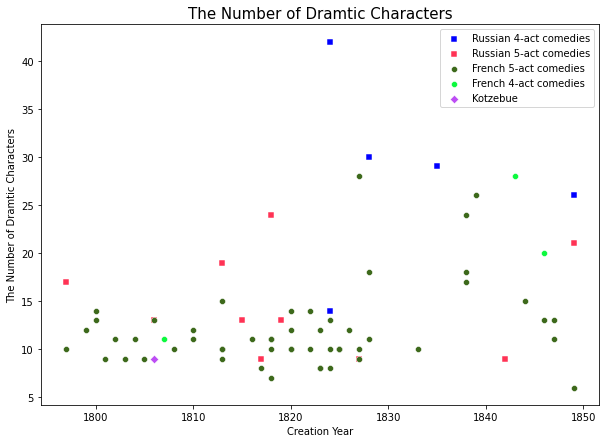

In [25]:
scatter('num_present_characters', 'The Number of Dramtic Characters')

In [26]:
summary('num_present_characters')

num_present_characters             
                                       mean   50%    std
source      num_acts                                    
russian     4.0                       28.20  29.0  10.01
            5.0                       14.70  13.0   5.33
french      4.0                       19.67  20.0   8.50
            5.0                       11.96  11.0   4.26
goldoni     5.0                       11.88  12.5   3.04
shakespeare 5.0                       25.83  24.0   7.15

,num_present_characters
Gore ot uma,42.0


,num_present_characters
Kotzebue,9.0


### Summary
- The mean number of dramatic characters and the standard deviation tended to be higher in the Russian four-act comedies (28.20, std of 10.01) than in the Russian five-act comedies (14.70, std of 5.33). 
- The same was true of the French four-act comedies: they tended to have a higher mean and standard deviation (19.67 with the standard deviation of 8.50) than the five-act comedies (11.96 with the standard deviation of 4.26). 
- The Russian four-act comedies had a higher mean number of dramatic characters (28.20) than the French four-act comedies (19.67)
- The Russian four-act comedies even had a higher mean number of dramatic characters than Shakespeare (25.83), which could have a few possible explanations: they could have been influenced by Shakespeare's later comedies (after 1600, with the mean number of dramatic characters of 30.20, they could have been influenced by Shakspeare's tragedies (with the mean number of dramatic characters of 38.67 before 1600 and 44.71 after 1600). They also could have experienced the influence of another Romantic tradition. 
- Aleksandr Griboedov's *Gore ot uma* had the highest number of dramatic characters (42). Out of the examined material, only Shakespeare had tragedies and one comedy that would have over 40 dramatic characters. 
- The number of dramatic characters in Kotzebue's comedy (9) was at the lower spectrum of the contemporaneous French comedies. It doesn't appear to be similar to Griboedov's comedy.
- It appears that the Russian five-act comedies of the 1810s and 1840s had two divergent trends: some tended to have a higher number of dramatic characters while others were similar to the contemporaneous French comedies. Neoclassical and Romantic tendencies co-existed.

### The Mobility Coefficient

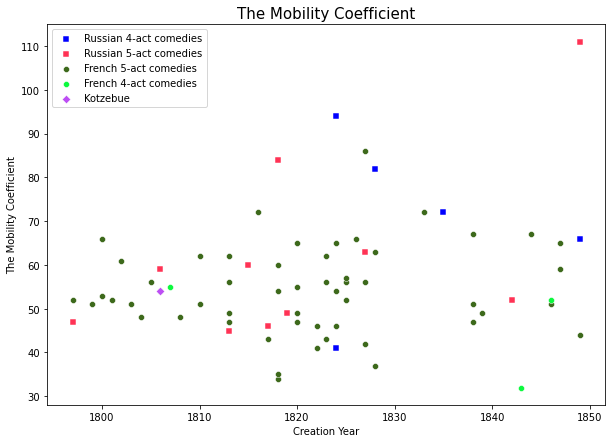

In [27]:
scatter('mobility_coefficient', 'The Mobility Coefficient')

In [28]:
summary('mobility_coefficient')

mobility_coefficient             
                                     mean   50%    std
source      num_acts                                  
russian     4.0                     71.00  72.0  19.85
            5.0                     61.60  55.5  20.91
french      4.0                     46.33  52.0  12.50
            5.0                     54.31  53.5   9.96
goldoni     5.0                     62.25  56.0  19.33
shakespeare 5.0                     78.00  74.0  16.68

,mobility_coefficient
Gore ot uma,94.0


,mobility_coefficient
Kotzebue,54.0


### Summary:
- The Russian four-act comedies tended to have a higher mean mobility coefficient (71) than the Russian five-act comedies (61.60). However, the standard deviation was slightly higher in the five-act comedies (20.91) than in the four-act comedies (19.85).
- The opposite is true of the French four-act comedies: they had a lower mean mobility coefficient (46.33) than the French five-act comedies (54.31). Their standard deviation, however, was higher (12.50 vs. 9.96).
- The Russian four-act comedies had a higher mean mobility coefficient (71) than the French four-act comedies (46.33).
- The Russian four-act comedies had a higher mean mobility coefficient than Goldoni (62.25) but lower than Shakspeare (78).
- Kotzbue's four-act comedy had a much lower mobility coefficient of 54.
- *Gore ot uma* had a very high mobility coefficient (94), however, in the Russian five-act tradition, there was one comedy, Petr Grigor’ev's *Zhiteiiskaia shkola* (1849).
- Based on this feature, the Russian five-act comedies of the 1810s and 1840s also had two divergent trends: Romantic and Neoclassical.

### The Standard Range of The Speaking Characters

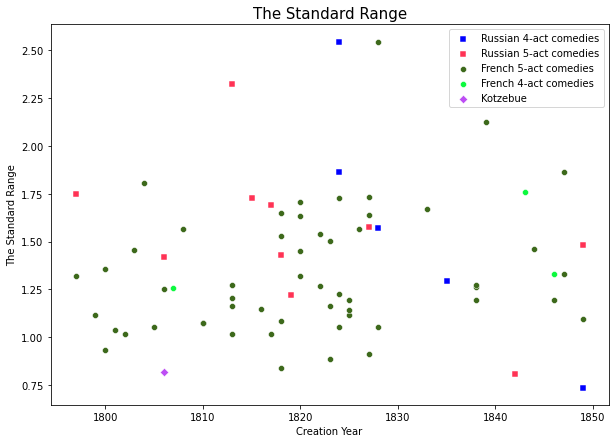

In [30]:
scatter('sigma_iarkho', 'The Standard Range')

In [31]:
combined_df.sort_values(by='sigma_iarkho', ascending=False)[['title', 'last_name', 'sigma_iarkho']]

,title,last_name,sigma_iarkho
217,La Princesse Aurélie,Delavigne,2.545
17,Gore ot uma,Griboedov,2.545
8,V sem''e ne bez uroda,Unknown,2.323
223,L'école des journalistes,Girardin,2.123
2,Love’s Labor’s Lost,Shakespeare,1.890
...,...,...,...
204,L'École des vieillards,Delavigne,0.884
197,"Le Faux ami de cour, ou le Danger des liaisons",Michaud,0.840
23,Novaia shkola muzhei,Zotov,0.810
24,Komediia iz sovremennoi zhizni,Krol’,0.737


In [32]:
summary('sigma_iarkho')

sigma_iarkho            
                             mean   50%   std
source      num_acts                         
russian     4.0              1.60  1.57  0.67
            5.0              1.54  1.53  0.39
french      4.0              1.45  1.33  0.27
            5.0              1.33  1.26  0.33
goldoni     5.0              1.21  1.20  0.32
shakespeare 5.0              1.33  1.28  0.30

,sigma_iarkho
Gore ot uma,2.54


,sigma_iarkho
Kotzebue,0.82


### Summary
- The Russian four-act comedies tended to have a slightly higher mean number standard range of the number of speaking characters (1.60) than the Russian five-act comedies (1.54).
- The French four-act comedies also had a higher mean standard range (1.45) than the five-act comedies (1.33).
- The Russian four-act comedies had a higher mean standard range (1.60) than the French four-act comedies (1.45).
- The standard range in the Russian four-act comedies was higher than in Shakespeare's comedies (1.33) and Goldoni's comedies (1.21).
- *Gore ot Uma* had a very high standard range of  2.54, which was the same as in Casimir Delavigne's five-act comedy *La Princesse Aurélie* (1828).
- Kotzebue's comedy with the standard range of 0.82 was at the very bottom of the French and Russian Neoclassical comedies.
- Based on this feature, the Russian five-act comedies of the 1810s and 1840s also had two divergent trends: Romantic and Neoclassical.

### The Percentage of Non-Dialogues

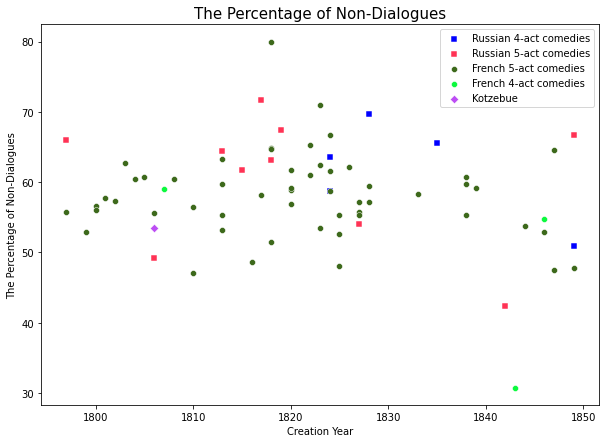

In [33]:
scatter('percentage_non_dialogues', 'The Percentage of Non-Dialogues')

In [34]:
summary('percentage_non_dialogues')

percentage_non_dialogues              
                                         mean    50%    std
source      num_acts                                       
russian     4.0                         61.69  63.64   7.20
            5.0                         60.64  63.77   9.23
french      4.0                         48.21  54.76  15.26
            5.0                         58.12  57.92   5.89
goldoni     5.0                         58.64  57.98  11.56
shakespeare 5.0                         61.76  63.28   7.56

,percentage_non_dialogues
Gore ot uma,58.67


,percentage_non_dialogues
Kotzebue,53.49


### Summary
- The mean percentage of non-dialogues in the Russian four-act comedies in verse (61.69%) was higher than in the Russian five-act comedies in verse (60.64%). The standard deviation, however, was lower in the four-act comedies (7.20%) than in the five-act comedies (9.23%).
- The French four-act comedies tended to have a lower mean percentage of non-dialogues (48.21%) than the French five-act comedies (58.12%). The standard deviation was higher in the four-act comedies (15.26%) vs. five-act comedies (5.89%).
- The Russian four-act comedies had a higher mean percentage of non-dialogues (61.69%) than the French four-act comedies (48.21%).
- The Russian four-act comedies had a higher percentage of non-dialogues than Shakespeare (with a mean of 61.76%) and Goldoni (with a mean of 53.49%).
- The percentage of non-dialogues in *Gore ot uma* was slightly below the mean for the Russian four-act comedies (61.64%).
- The percentage of non-dialogues in Kotzbue's *Der Russe in Deutschland* (53.49%) corresponded to the Neoclassical French and Russian comedies of the time.

### The Percentage of Polylogues

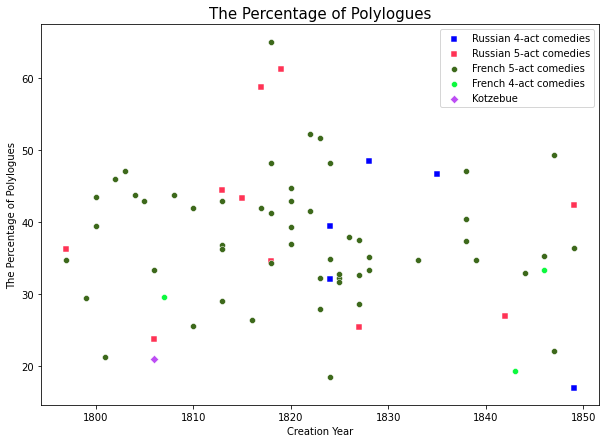

In [35]:
scatter('percentage_polylogues', 'The Percentage of Polylogues')

In [36]:
summary('percentage_polylogues')

percentage_polylogues              
                                      mean    50%    std
source      num_acts                                    
russian     4.0                      36.68  39.39  12.79
            5.0                      39.68  39.26  13.03
french      4.0                      27.37  29.55   7.30
            5.0                      37.69  36.83   8.49
goldoni     5.0                      38.74  40.30  14.48
shakespeare 5.0                      37.85  36.90   9.72

,percentage_polylogues
Gore ot uma,32.0


,percentage_polylogues
Kotzebue,20.93


### Summary
- The mean percentage of polylogues in the Russian four-act comedies (36.68%) was lower than in the Russian five-act comedies (39.68%). The standard deviation was also lower in the four-act comedies (12.79%) vs. 13.03% in the five-act comedies.
- The mean percentage of polylogues in the French four-act comedies (27.37%) was lower than in the French five-act comedies (37.69%). The standard deviation was also lower in the four-act comedies (7.30% vs. 8.49%).
- The mean percentage of polylogues in the Russian four-act comedies (36.68%) was higher than in the French four-act comedies (27.37%).
- The percentage of polylogues in the Russian four-act comedies was lower than in Shakespeare (37.85%) and Goldoni (38.74%).
- The percentage of polylogues in *Gore ot Uma* (32%) was below the average for the Russian four-act plays (36.68%).
- The percentage of polylogues in Kotzebue's four-act comedy was 20.93%, which was at the very bottom of the French and Russian Neoclassical comedies.
- Based on this feature, the Russian five-act comedies of the 1810s and 1840s also had two divergent trends: Romantic and Neoclassical.
- The comedy with the largest percentage of polylogues in our corpus (65%) was Merville's *La Famille Glinet*  (1818).

### The Percentage of Monologues

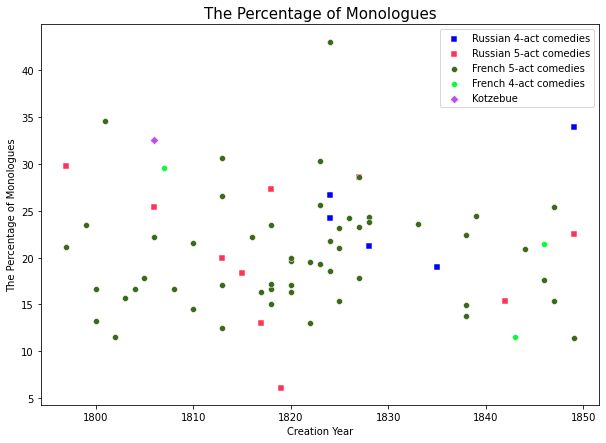

In [37]:
scatter('percentage_monologues', 'The Percentage of Monologues')

In [38]:
summary('percentage_monologues')

percentage_monologues             
                                      mean    50%   std
source      num_acts                                   
russian     4.0                      25.01  24.24  5.80
            5.0                      20.65  21.26  7.60
french      4.0                      20.84  21.43  9.02
            5.0                      20.35  19.58  5.97
goldoni     5.0                      19.65  19.89  4.97
shakespeare 5.0                      23.56  22.23  7.07

,percentage_monologues
Gore ot uma,26.67


,percentage_monologues
Kotzebue,32.56


### Summary:
- The Russian four-act comedies tended to have a higher mean percentage of monologues (25.01%) than the Russian five-act comedies (20.65%). They had a lower standard deviation (5.80% vs. 7.60%).
- The Frencc four-act comedies had a slightly higher percentage of monologues (20.84%) than the French five-act comedies (20.35%). The four-act comedies also had a higher standard deviation of 9.02% than the five-act comedies (5.975).
- The Russian four-act comedies had a higher mean percentage of monologues than Shakspeare (with a mean of 23.56%) and Goldoni (with a mean of 19.65%), but still much lower than the percentage of monologues in Kotzebue's comedy (32.56%).
- The comedy with the largest percentage of monologues in our corpus (43.08%) was Casimir Bonjour's *Le Mari à bonnes fortunes, ou La Leçon* (1824).
- *Gore ot uma* with 26.67% of monologues was slightly above the mean for the Russian four-act comedies (25.01%)

### The Coefficient of Unused Dramatic Characters

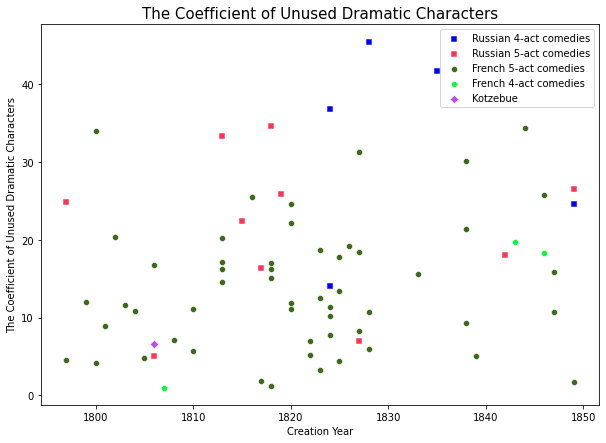

In [39]:
scatter('coefficient_unused', 'The Coefficient of Unused Dramatic Characters')

In [40]:
summary('coefficient_unused')

coefficient_unused              
                                   mean    50%    std
source      num_acts                                 
russian     4.0                   32.53  36.77  12.98
            5.0                   21.40  23.64   9.95
french      4.0                   13.00  18.25  10.41
            5.0                   13.74  11.94   8.25
goldoni     5.0                   17.28  14.80   8.63
shakespeare 5.0                   40.99  41.90   9.01

,coefficient_unused
Gore ot uma,36.77


,coefficient_unused
Kotzebue,6.59


### Summary:
- The Russian four-act comedies had a higher mean coefficient of unused dramatic characters (32.53) than the Russian five-act comedies with the mean of 21.40. The standard deviation in the four-act comedies was also higher (12.98 vs. 9.95 in the five-act ones).
- The French four-act comedies had a lower mean coefficient of unused dramatic characters (13 vs. 13.74), however, they had a higher median (18.25 vs. 11.94). They had a higher standard deviaiton of 10.41 vs. 8.25 for the French five-act comedies.
- The Russian four-ac comedies had a higher mean percentage of unused dramatic characters than the French four-act coemdies (with a mean of 13).
- The Russian four-act comedies had a higher mean coefficient of unused dramatic characters (32.53) than Goldoni (with a mean of 17.28) but lower than Shakespeare (40.99). They had a much higher coefficient of unused dramatic characters than Kotzebue with 6.59 who again was among the lower spectrum of the Neoclassical comedies.
- *Gore ot uma* had the coefficient of unused dramatic characters of 36.77, which was above the mean for the Russian four-act comedies (32.53).

### The Percentage of Discontinuous Scenes

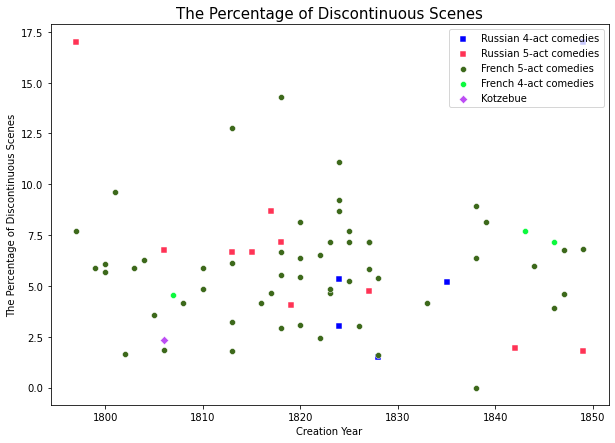

In [41]:
scatter('discontinuous_scenes', 'The Percentage of Discontinuous Scenes')

In [42]:
summary('discontinuous_scenes')

discontinuous_scenes             
                                     mean    50%   std
source      num_acts                                  
russian     4.0                      6.41   5.17  6.12
            5.0                      6.55   6.67  4.32
french      4.0                      6.46   7.14  1.68
            5.0                      5.83   5.88  2.71
goldoni     5.0                      9.80  10.40  2.87
shakespeare 5.0                     19.35  18.88  5.77

,discontinuous_scenes
Gore ot uma,5.33


,discontinuous_scenes
Kotzebue,2.33


### Summary:
- The Russian four-act comedies had a lower mean percentage of discontinuous scenes (6.41%) than the Russian five-act comedies (6.55%). The four-act comedies had a higher standard deviation (6.12% vs. 4.32% for the five-act comedies).
- The French four-act comedies had a higher mean percentage of discontinuous scenes (6.46%) than the French five-act comedies (5.83%). They had a lower standard deviation (1.68% vs. 2.71% for the French five-act comedies). 
- The Russian four-act comedies had a lower mean percentage of discontinuous scenes than the French four-act comedies (6.46%), Goldoni (with a mean of 9.80%), and Shakespeare (19.35%). They had a higher mean percentage of discontinuous scenes than the French five-act comedies (5.83%) and Kotzebue (2.33%).
- *Gore ot uma* had 5.33% of discontinous scenes, which was below the mean for the Russian four-act comedies.

## Conclusions:
1. Based on all features, except the percentage of polylogues and the percentage of discontinuous scenes, the Russian four-act comedies had higher mean values than the Russian five-act comedies.
2. For all features, except for the percentage of discontinuous scenes, the Russian four-act comedies had higher mean values than the French four-act comedies.
3. Based on some features, including the number of dramatic characters, the standard range of the number of speaking characters, the percentage of monologues, and the percentage of discontinuous scenes, the French four-act comedies had higher mean values than the French five-act comedies. The opposite was true for such features as the mobility coefficient, the percentage of non-dialogues, the percentage of polylogues, and the coefficient of unused dramatic characters.
3. The Russian four-act comedies had a higher mean number of dramatic characters, the mean standard range of the number of speaking characters, the percentage of non-dialogues, and the percentage of polylogues than the mean for Shakespeare. They had a lower mean mobility coefficient, the percentage of polylogues, the percentage of discontinuous scenes, and the coefficient of unused dramatic characters than Shakespeare. 
4. The Russian four-act comedies had lower mean values than Goldoni only for the percentage of polylogues and the percentage of discontinuous scenes.
5. Aleksandr Griboedov's *Gore ot uma* had the maximum number of dramatic characters (42), which was the same as the maximum number of dramatic characters in Shakespeare's comedies (in *Cymbeline* (1609), yet, it was lower than some of Shakespeare's tragedies that would have over 50 dramatic characters. Among the Russian and French comedies, *Gore ot uma* had the second-highest mobility coefficient (94) after Petr Grigor’ev's *Zhiteiiskaia shkola* (1849) with 111. In fact, *Zhiteiiskaia shkola* exceeded even the maximum for Shakespeare's comedies (*Cymbeline* with the mobility coefficient of 107). *Gore ot uma* had the second highest standard range of the speaking characters in the Russian verse comedy (2.54), after Vasilii Kapnist's *Iabeda* (1794) with sigma of 2.77. *Gore ot uma* was below the mean for the Russian four-act comedies based on the percentage of non-dialogues, the percentage of polylogues, and the percetantage of discontinuous scenes. It was above the mean based on the percentage of monologues and the coefficient of unused dramatic characters.
6. Based on its structural characteristics, Kotzebue's *Der Russe in Deutschland* (1806) was a conservative Neoclassical comedy.
7. In the Russian five-act comedies of the 1810 and 1840s, two styles, the Neoclassical and Romantic, coexisted.